In [22]:
#pip install gradio

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

In [24]:
mist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mist.load_data() # Load data

In [25]:
print("x_train shape:",x_train.shape,"y_train_shape:", y_train.shape,"\nX_test shape:",x_test.shape,"y_test shape: ", y_test.shape)

x_train shape: (60000, 28, 28) y_train_shape: (60000,) 
X_test shape: (10000, 28, 28) y_test shape:  (10000,)


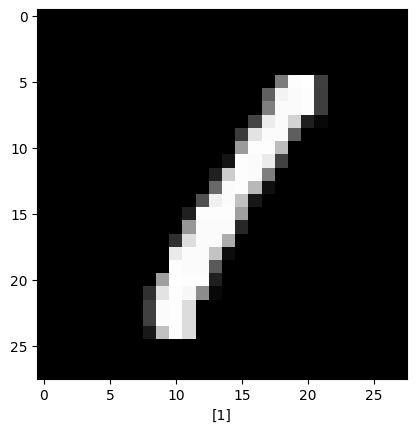

In [26]:
plt.imshow(x_train[3],cmap="gray")
plt.xlabel([y_train[3]])
plt.show()

In [27]:
x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [28]:
model = tf.keras.models.Sequential()
#aading the input to maodel
model.add(tf.keras.layers.Flatten())
#Bulid the input and the hidden layers
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

#bulid the output layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


In [29]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [30]:
model_fitting = model.fit(x=x_train,y =y_train, batch_size=60,verbose=1,epochs=5,validation_split=.3)

Epoch 1/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8257 - loss: 0.6572 - val_accuracy: 0.9467 - val_loss: 0.1781
Epoch 2/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9551 - loss: 0.1513 - val_accuracy: 0.9584 - val_loss: 0.1388
Epoch 3/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9706 - loss: 0.0959 - val_accuracy: 0.9596 - val_loss: 0.1329
Epoch 4/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9772 - loss: 0.0723 - val_accuracy: 0.9644 - val_loss: 0.1190
Epoch 5/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9847 - loss: 0.0498 - val_accuracy: 0.9661 - val_loss: 0.1158


In [31]:

test_loss,test_acc = model.evaluate(x=x_test,y= y_test)


print("\nTest Accuracu:", test_acc)
print("\nTest Loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1144

Test Accuracu: 0.9700999855995178

Test Loss: 0.09774457663297653


In [32]:
predictions = model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


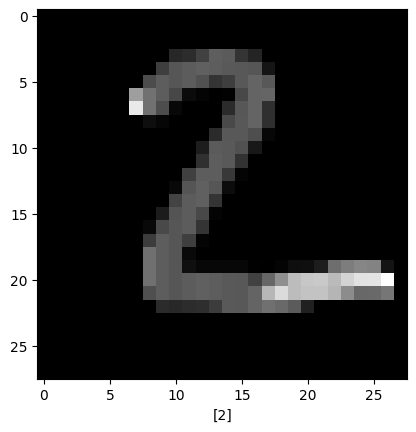

In [33]:
plt.imshow(x_test[1],cmap="gray")
plt.xlabel([y_test[1]])
plt.show()

In [34]:
print(np.argmax(predictions[1]))

2


In [35]:
def plot(i, predictions_array, true_label,img):
    predictions_array, true_label, img = predictions_array[i+10],true_label[i+10], img[i+10]
    plt.grid (True)
    plt.xticks([])
    plt.yticks([])
    #show the image of data 
    plt.imshow(img, cmap='gray')
    
    #condition for check if the prediction is right or wrong 
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color ='green'
    else:
        color = 'red'

    plt.xlabel ("Predicted Label: {} ,\nTrue: {}".format([predicted_label],
                    [true_label]),
                    color=color)



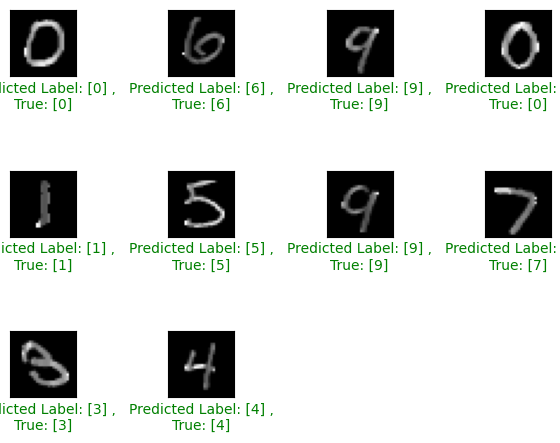

In [36]:
num_rows =4
num_cols =4
num_images = 10
plt.figure(figsize=(1*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot(i, predictions, y_test, x_test)
    
plt.show()

In [37]:
def predict_image(img):
    img_3d = img.reshape(-1,28,28)
    im_resize=tf.keras.utils.normalize(img_3d, axis =1)
    prediction = model.predict(im_resize)
    ans=np.argmax(prediction)
    return ans


In [38]:
test_loss,test_acc = model.evaluate(x=x_test,y= y_test)


print("\nTest Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1144

Test Accuracy: 0.9700999855995178


In [39]:
import gradio as gr

In [40]:
title = "Digit Recognition System"
description = """

A simple Machine learing Tool to recognize digits!!


"""

In [41]:
iface = gr.Interface(predict_image,inputs="sketchpad", outputs="label",title = title, description = description)

In [43]:
iface.launch()


Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----

To create a public link, set `share=True` in `launch()`.


Using existing dataset file at: .gradio\flagged\dataset1.csv
